SVM (Support Vectore Machine) is one of the most popular supervised learning algorithm used for classification as well as
regression problems. Yet, primarily used for classification in ML.
The goal of SVM is to create the best line or decision boundary that can segregrate n-dimensional space into classes
so, we can easily put the new data point in the correct class in the future. This best decision boundary is called 
Hyperplane. SVM chooses the extreme points/vectors to create the hyperplane. These extreme cases are called as support vectors and hence algorithm is termed as Support Vector Machine.

The primary objective of this analysis is to predict whether a customer will respond to a marketing campaign based on 
their demographic and financial information. This is a binary classification problem.

In [2]:
import pandas as pd

#Let's load the dataset
df = pd.read_csv('campaign_responses.csv')

#Display the first 5 rows
print('First 5 rows of the dataset:')
print(df.head().to_markdown(index=False,numalign='left',stralign='left'))

#Print the column names and their datatypes
print('\nColumn name and their datatypes:')
print(df.info())

#Print the descriptive statistics of the model
print('\nDescriptive Statistics:')
print(df.describe().to_markdown(numalign='left',stralign='left'))

First 5 rows of the dataset:
| customer_id   | age   | gender   | annual_income   | credit_score   | employed   | marital_status   | no_of_children   | responded   |
|:--------------|:------|:---------|:----------------|:---------------|:-----------|:-----------------|:-----------------|:------------|
| 1             | 35    | Male     | 65000           | 720            | Yes        | Married          | 2                | Yes         |
| 2             | 28    | Female   | 45000           | 680            | No         | Single           | 0                | No          |
| 3             | 42    | Male     | 85000           | 750            | Yes        | Married          | 3                | Yes         |
| 4             | 31    | Female   | 55000           | 710            | Yes        | Single           | 1                | No          |
| 5             | 47    | Male     | 95000           | 790            | Yes        | Married          | 2                | Yes         |

Column name

Step 2 - EDA Target Variable Distribution

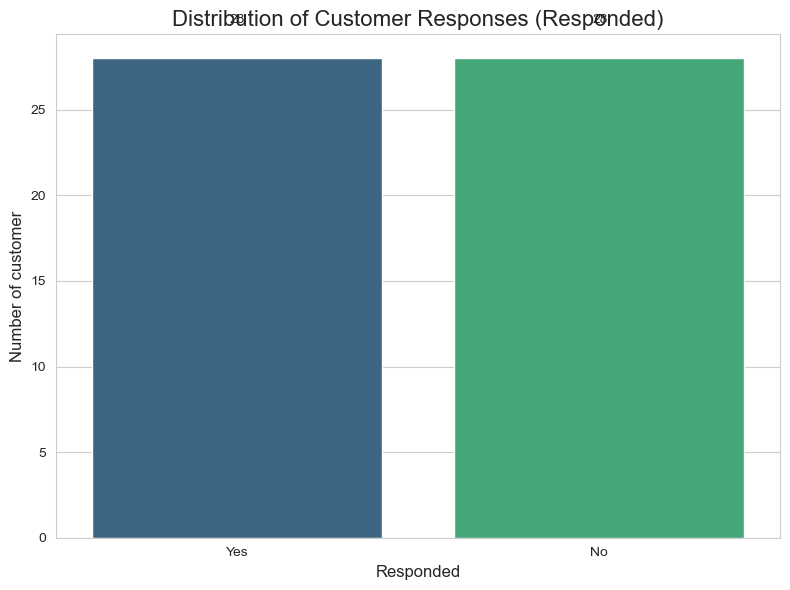


Value counts for the 'responded' column:
| count   | count   |
|:--------|:--------|
| Yes     | 28      |
| No      | 28      |


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Let's set a background for the plots
sns.set_style('whitegrid')

#Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(8,6))

#Plot the count of responded values
sns.countplot(x='responded',data=df,ax=ax,palette='viridis')

#Let's add titles and labels for clarity
ax.set_title('Distribution of Customer Responses (Responded)',fontsize=16)
ax.set_xlabel('Responded',fontsize=12)
ax.set_ylabel('Number of customer',fontsize=12)

#Add value count on top of the bars

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',
               textcoords='offset points')
    
#Display the plot
plt.tight_layout()
plt.show()

#Display the value counts in markdown table
print("\nValue counts for the 'responded' column:")
print(df['responded'].value_counts().reset_index().rename(columns={'index':'Responded','responded':'count'}).to_markdown(index=False, numalign="left", stralign="left"))

This indicates a perfectly balanced dataset(28 yes and 28 no) for the target variable, which is good for model training as it avoids class imbalance issues.

Now let's analyse the relationship between the numerical features and the target variable with a boxplot which helps
identify potential feautures that are strong predictors of customer's response.

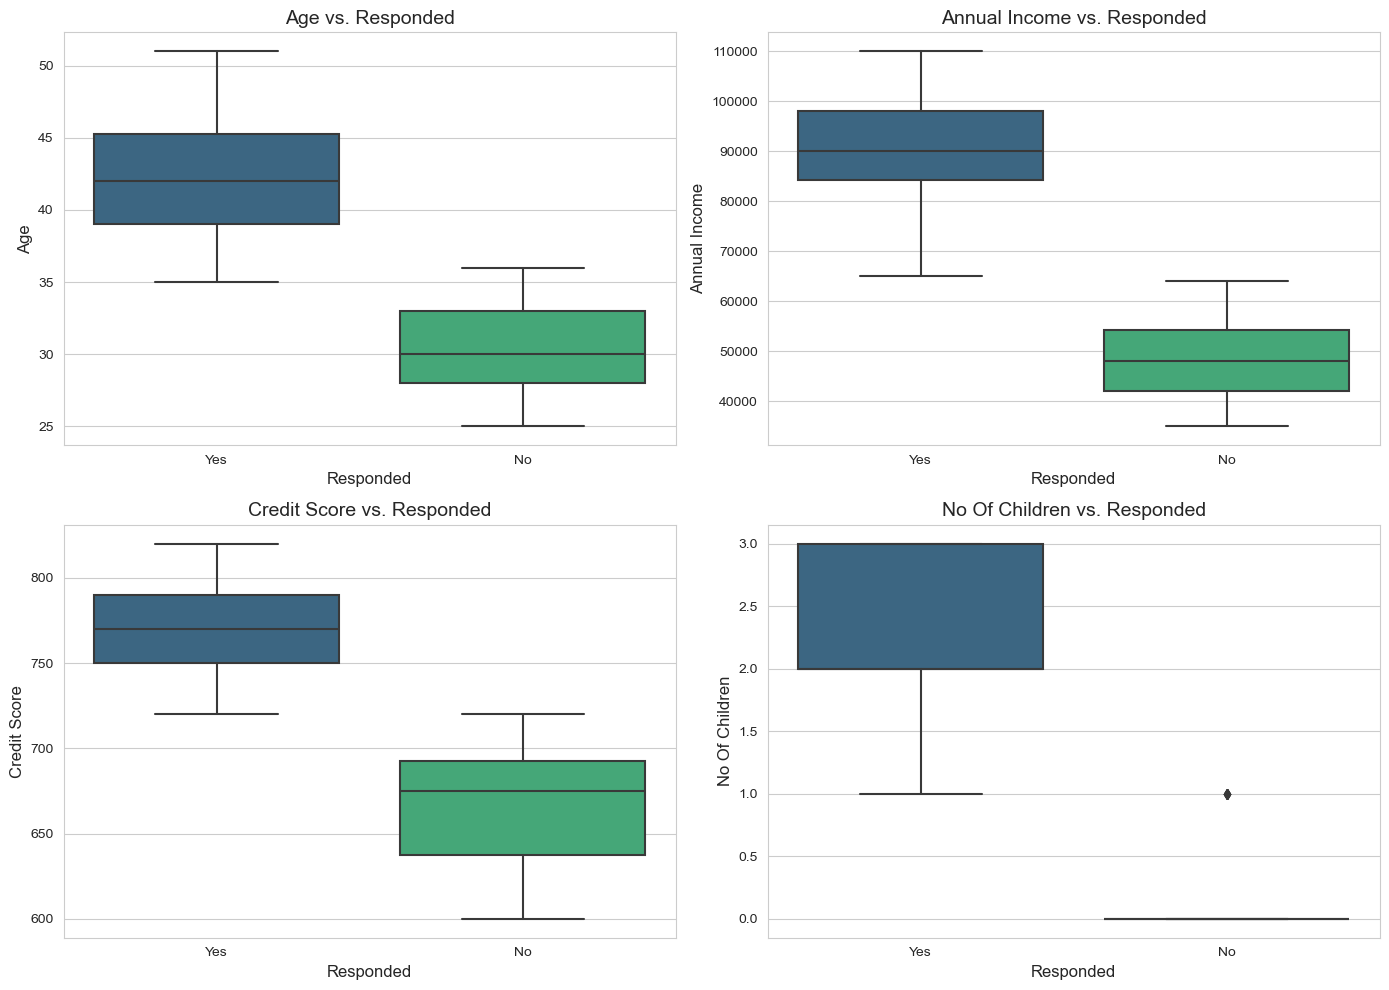

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#let's setup a background
sns.set_style('whitegrid')

#Let's define our numerical columns
numerical_cols = ['age','annual_income','credit_score','no_of_children']

#Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(14,10))
axes = axes.flatten() #Flattened to a 2x2 array of axes for easy iteration

#Now let's loop through each numerical column and create a box plot
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='responded',y=col, data=df,ax=axes[i],palette='viridis')
    axes[i].set_title(f'{col.replace("_"," ").title()} vs. Responded',fontsize=14)
    axes[i].set_xlabel('Responded',fontsize=12)
    axes[i].set_ylabel(col.replace("_"," ").title(),fontsize=12)
#Now Adjust layout to prevent any overlap
plt.tight_layout()
plt.show()

Step 4: Exploratory Data Analysis (EDA) - Categorical Features vs. Target Variable
we will examine how categorical features (gender, employed, and marital_status) relate to the responded variable.

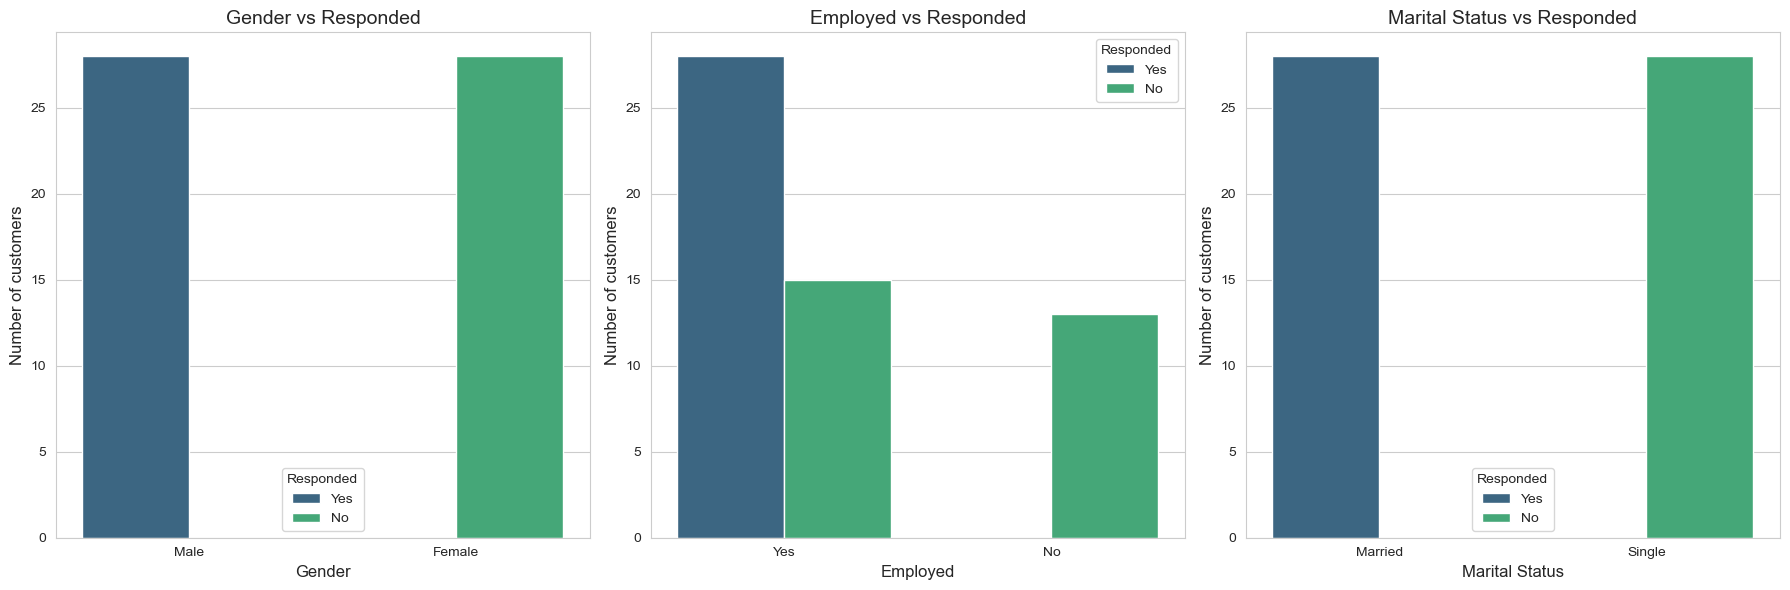

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 

#let's set a background for the plot
sns.set_style('whitegrid')

#Let's define the categorical column for analysis
categorical_cols = ['gender','employed','marital_status']

#Now we shall create subplots for each categorical feature
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
axes = axes.flatten() #Flatten the array of axes for easy iteration

#Now loop through each categorical column and create a count plot with 'responded' as hue
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col,hue='responded',data=df,ax=axes[i],palette='viridis')
    axes[i].set_title(f'{col.replace("_"," ").title()} vs Responded',fontsize=14)
    axes[i].set_xlabel(col.replace("_"," ").title(),fontsize=12)
    axes[i].set_ylabel('Number of customers',fontsize=12)
    axes[i].legend(title='Responded')

#Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Step - 5 Data Preprocessing and splitting 

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

#Let's reload the dataset to ensure we start with the original state
df = pd.read_csv('campaign_responses.csv')

#Separate features(X) and target (Y)

X = df.drop('responded',axis=1)
y = df['responded']

#Identify categorical and numerical column and exclude the customer_id column from features
categorical_features = ['gender','employed','marital_status']
numerical_features = ['age','annual_income','credit_score','no_of_children']

#preprocessing for numerical data (scaling) and categorical data(one-hot encoding)
#We shall use columntransfer to apply transformations such as standardscaler and onehot encoding on different columns/features
preprocessor = ColumnTransformer(transformers=[('num',StandardScaler(),numerical_features),
                                           ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_features)],
                             remainder='drop') #Using'drop' we're dropping unspecified columns in transformer(like cutomerid)

#Apply preprocessing steps to X
X_processed = preprocessor.fit_transform(X)

#Encode the target variable 'responded'
#We use LabelEncoder for the binary target variable 'responded'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#Get the name of the onehot encoded columns
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

#Convert X_processed back to a DataFrame for better readability
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# Display the first few rows of the processed features and the encoded target
print("First 5 rows of preprocessed features (X_processed_df):")
print(X_processed_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 values of encoded target (y_encoded):")
print(y_encoded[:5])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

First 5 rows of preprocessed features (X_processed_df):
| age       | annual_income   | credit_score   | no_of_children   | gender_Female   | gender_Male   | employed_No   | employed_Yes   | marital_status_Married   | marital_status_Single   |
|:----------|:----------------|:---------------|:-----------------|:----------------|:--------------|:--------------|:---------------|:-------------------------|:------------------------|
| -0.172859 | -0.177936       | 0.0149308      | 0.607457         | 0               | 1             | 0             | 1              | 1                        | 0                       |
| -1.16934  | -1.06366        | -0.65397       | -1.09342         | 1               | 0             | 1             | 0              | 0                        | 1                       |
| 0.82362   | 0.707788        | 0.516607       | 1.4579           | 0               | 1             | 0             | 1              | 1                        | 0                       |
| -0

Step 6 - Model building, Training and Evaluation

Training the svm model
Model training complete
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12


Confusion Matrix:
[[6 0]
 [0 6]]


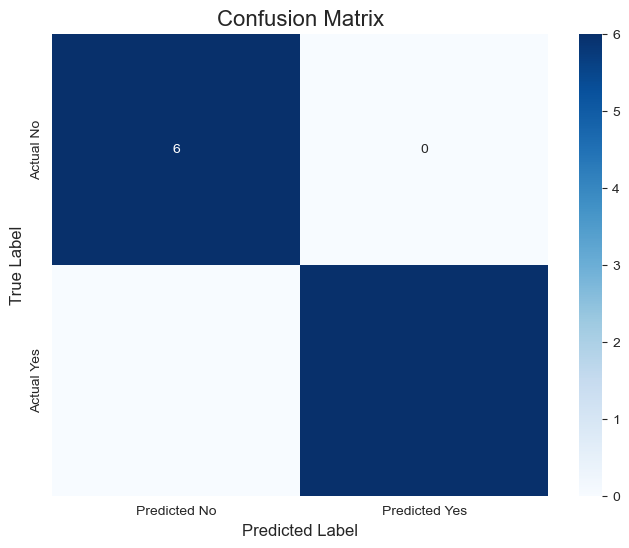

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



#Import the support vector classifier model SVC using a linear Kernel as a starting point
svm_model = SVC(kernel='linear',random_state=42)


#Train the SVM model using the training data
print('Training the svm model')
svm_model.fit(X_train,y_train)
print('Model training complete')


#Make prediction on the data set

y_pred = svm_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (includes Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()